# SnapATAC Peak Matrix Analysis

pmat using peaks combined across cell states from 20200122_SnapATAC analysis.

In [1]:
library(SnapATAC)
library(GenomicRanges)
library(ggplot2) 
library(scales)
library(RColorBrewer)

# https://github.com/r3fang/SnapATAC/tree/master/examples/10X_snATAC
# https://github.com/r3fang/SnapATAC/tree/master/examples/10X_brain_5k

Loading required package: Matrix

Loading required package: rhdf5

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:SnapATAC’:

    colMeans, colSums, rowMeans, rowSums


The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapp

In [2]:
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

In [3]:
DAYS = c("D0", "D2", "D4", "D6", "D8", "D10", "D12", "D14", "iPSC")
FILE_PREFIX = "/srv/scratch/surag/scATAC-reprog/chromap/snap"
BARCODES_PREFIX = "../20200424_ArchR/barcodeLists/20210713_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25/"

file.list = c()
barcode.file.list = c()

for (d in DAYS) {
    file.list = c(file.list, sprintf("%s/%s.snap", FILE_PREFIX, d))
    barcode.file.list = c(barcode.file.list, sprintf("%s/%s.barcodes.txt", BARCODES_PREFIX, d))
}
DAYS
file.list
barcode.file.list

[1] "D0"   "D2"   "D4"   "D6"   "D8"   "D10"  "D12"  "D14"  "iPSC"

[1] "/srv/scratch/surag/scATAC-reprog/chromap/snap/D0.snap"  
[2] "/srv/scratch/surag/scATAC-reprog/chromap/snap/D2.snap"  
[3] "/srv/scratch/surag/scATAC-reprog/chromap/snap/D4.snap"  
[4] "/srv/scratch/surag/scATAC-reprog/chromap/snap/D6.snap"  
[5] "/srv/scratch/surag/scATAC-reprog/chromap/snap/D8.snap"  
[6] "/srv/scratch/surag/scATAC-reprog/chromap/snap/D10.snap" 
[7] "/srv/scratch/surag/scATAC-reprog/chromap/snap/D12.snap" 
[8] "/srv/scratch/surag/scATAC-reprog/chromap/snap/D14.snap" 
[9] "/srv/scratch/surag/scATAC-reprog/chromap/snap/iPSC.snap"

[1] "../20200424_ArchR/barcodeLists/20210713_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D0.barcodes.txt"  
[2] "../20200424_ArchR/barcodeLists/20210713_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D2.barcodes.txt"  
[3] "../20200424_ArchR/barcodeLists/20210713_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D4.barcodes.txt"  
[4] "../20200424_ArchR/barcodeLists/20210713_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D6.barcodes.txt"  
[5] "../20200424_ArchR/barcodeLists/20210713_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D8.barcodes.txt"  
[6] "../20200424_ArchR/barcodeLists/20210713_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D10.barcodes.txt" 
[7] "../20200424_ArchR/barcodeLists/20210713_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D12.barcodes.txt" 
[8] "../20200424_ArchR/barcodeLists/20210713_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//D14.barcodes.txt" 
[9] "../20200424_ArchR/barcodeLists/20210713_ArchR_nFrags_1000_TSS_6_doublet_enrichment_1.25//iPSC.barcodes.txt"

In [4]:
x.sp.ls = lapply(seq(file.list), function(i) {
    x.sp = createSnap(file = file.list[i],                      
                     sample = DAYS[i])
    x.sp
})

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...

Epoch: reading the barcode session ...



In [5]:
# Filter cells using previously selected barcodes (see BarcodeSelection.ipynb)

barcode.list = lapply(barcode.file.list, function(file){
  read.table(file)[,1];
})
x.sp.list = lapply(seq(x.sp.ls), function(i){
  x.sp = x.sp.ls[[i]];
  x.sp  = x.sp[x.sp@barcode %in% barcode.list[[i]],];
})
names(x.sp.list) = DAYS;

In [6]:
x.sp.list = lapply(seq(x.sp.list), function(i) {
    x.sp = addPmatToSnap(x.sp.list[[i]], num.cores=5)
    x.sp
})

Epoch: reading cell-peak count matrix session ...

Epoch: reading cell-peak count matrix session ...

Epoch: reading cell-peak count matrix session ...

Epoch: reading cell-peak count matrix session ...

Epoch: reading cell-peak count matrix session ...

Epoch: reading cell-peak count matrix session ...

Epoch: reading cell-peak count matrix session ...

Epoch: reading cell-peak count matrix session ...

Epoch: reading cell-peak count matrix session ...



In [7]:
# merge timepoints
x.sp = Reduce(snapRbind, x.sp.list);

Warning message:
“'rBind' is deprecated.
 Since R version 3.2.0, base's rbind() should work fine with S4 objects”


In [8]:
x.sp

number of barcodes: 65357
number of bins: 0
number of genes: 0
number of peaks: 531538
number of motifs: 0

In [9]:
dim(x.sp@pmat)

[1]  65357 531538

In [10]:
rm(x.sp.list); # free memory
gc()

used      (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells   4489053  239.8    7549422   403.2    6326898   337.9
Vcells 845429436 6450.2 3158087140 24094.3 2359887600 18004.6

In [11]:
# check if reads at OCT promoter (very few or none in initial version)
sum(x.sp@pmat[,subjectHits(findOverlaps(GRanges(c("chr6:31170549-31170836"))+500, x.sp@peak))])

[1] 1828

In [12]:
# filter out cells in clump from metadata (cluster 15) 
# or iPSC (cluster 16, removing these are likely artifacts and are very few)
metadata = read.table("../20200122_snapATAC/snapATAC_sessions/20210714_n64913/metadata.tsv", header=T)
head(metadata)

clump_barcodes = paste(metadata$sample, metadata$barcode, sep='_')[(metadata$cluster==16)]
length(clump_barcodes)

barcode          TN    UM    PP    UQ    CM  landmark cluster umap1    
1 AAACACGCTTAACGAA  1328  1328  1328  1327   5 1        1        8.396315
2 AAACCGTACCTTTAGG 54909 54909 54909 54818 165 1        1       10.035314
3 AAACGAAACGCGTATT 49322 49322 49322 49243 188 1        1       10.541276
4 AAACGACCTTTGGGAG 11161 11161 11161 11151   4 1        1        8.873945
5 AAACTCCGACGCACTG  6470  6470  6470  6468  19 1        1        7.968798
6 AAAGCCTTGCGTTCTC 33550 33550 33550 33507  16 1        1        9.229990
  umap2      sample
1  0.7358631 D0    
2 -3.5276003 D0    
3 -2.7990236 D0    
4 -1.1558075 D0    
5 -0.1711029 D0    
6 -3.0323250 D0

[1] 2198

In [13]:
nrow(metadata) - length(clump_barcodes)

[1] 62715

In [14]:
# choosing only those cells that have received reprogramming OSK factors
# manually choosing clusters + fibroblasts
# fibr_plus_osk_barcodes = paste(metadata$sample, metadata$barcode, sep='_')[metadata$cluster %in% c(5, 4, 8, 14, 2, 9, 7, 13, 1)]
# length(fibr_plus_osk_barcodes)

In [15]:
# from previous notebook, no cells from D14 (or non iPSC samples) fall in iPSC cluster 
# these have been omited in the metadata
# remove them
table(metadata[metadata$cluster==8, "sample"])

x.sp = x.sp[paste(x.sp@sample, x.sp@barcode, sep='_') %in% paste(metadata$sample, metadata$barcode, sep='_'),]


  D0  D10  D12  D14   D2   D4   D6   D8 iPSC 
   0    0    0    0    0    0    0    0 7364 

In [16]:
# for standard analysis with all cell states
x.sp = x.sp[!paste(x.sp@sample, x.sp@barcode, sep='_') %in% clump_barcodes,]

# for analysis with only fibroblast + states with OSK
# x.sp = x.sp[paste(x.sp@sample, x.sp@barcode, sep='_') %in% fibr_plus_osk_barcodes,]

In [17]:
# or remove cells not present in another list
# metadata = read.table("./sessions/20200220_n74838/metadata.tsv", header=T)

# x.sp = x.sp[paste(x.sp@sample, x.sp@barcode, sep='_') %in% rownames(metadata), ]

In [18]:
x.sp

number of barcodes: 62715
number of bins: 0
number of genes: 0
number of peaks: 531538
number of motifs: 0

In [19]:
x.sp = makeBinary(x.sp, mat="pmat");

In [20]:
tempCov = Matrix::rowSums(x.sp@pmat)
quantile(tempCov, c(0.995))

99.5% 
36083.86

In [21]:
min(tempCov)

[1] 288

In [22]:
# minimum threshold
x.sp = x.sp[tempCov>=500, ]

In [23]:
# remove barcodes with too many bins (outliers)
# x.sp = x.sp[tempCov<quantile(tempCov, c(0.995)), , mat="pmat"]
# x.sp

In [24]:
x.sp

number of barcodes: 62599
number of bins: 0
number of genes: 0
number of peaks: 531538
number of motifs: 0

## Filtering bins

In [25]:
black_list = read.table("../../../resources/blacklist/GRch38_unified_blacklist.bed");
black_list.gr = GRanges(
    black_list[,1], 
    IRanges(black_list[,2], black_list[,3])
  );

In [26]:
idy = queryHits(findOverlaps(x.sp@peak, black_list.gr));

In [27]:
if(length(idy) > 0){x.sp = x.sp[,-idy, mat="pmat"]};

In [28]:
# chr.exclude = seqlevels(x.sp@peak)[grep("random|chrM|chrUn", seqlevels(x.sp@peak))];
# idy = grep(paste(chr.exclude, collapse="|"), x.sp@peak);
# if(length(idy) > 0){x.sp = x.sp[,-idy, mat="pmat"]};

In [29]:
x.sp

number of barcodes: 62599
number of bins: 0
number of genes: 0
number of peaks: 530910
number of motifs: 0

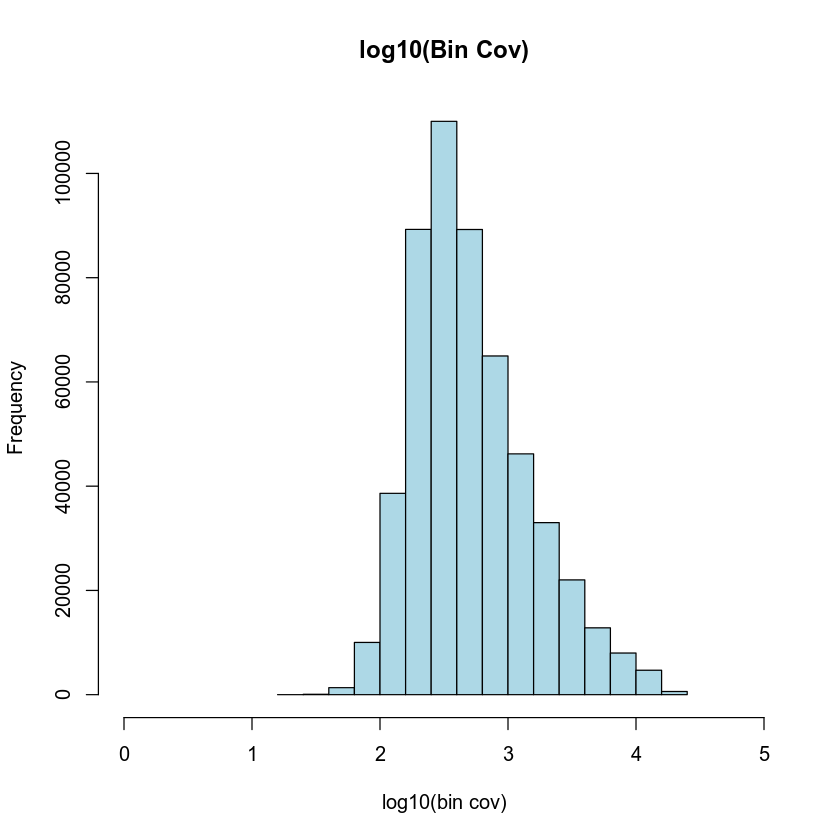

In [30]:
bin.cov = log10(Matrix::colSums(x.sp@pmat)+1);
hist(
  bin.cov[bin.cov > 0], 
  xlab="log10(bin cov)", 
  main="log10(Bin Cov)", 
  col="lightblue", 
  xlim=c(0, 5)
);

In [31]:
bin.cutoff = quantile(bin.cov[bin.cov > 0], 0.95);
idy = which(bin.cov <= bin.cutoff & bin.cov > 0);
x.sp = x.sp[, idy, mat="pmat"];
x.sp

number of barcodes: 62599
number of bins: 0
number of genes: 0
number of peaks: 504369
number of motifs: 0

## Dim Reduction 

In [36]:
rowCovs = Matrix::rowSums(x.sp@pmat)

In [37]:
table(x.sp@sample)


   D0   D10   D12   D14    D2    D4    D6    D8  iPSC 
11183  1200  2788 13191  6559  5432  7494  7423  7329 

In [38]:
row.covs = log10(rowCovs+1);

LANDMARKS_PER_DAY = 1200 # ceiling(10000/length(DAYS))
row.covs.dens = density(
    x = row.covs, 
    bw = 'nrd', adjust = 1
  );
sampling_prob = 1 / (approx(x = row.covs.dens$x, y = row.covs.dens$y, xout = row.covs)$y + .Machine$double.eps); 

In [39]:
set.seed(1);
idx.landmark.ds = c()

for (d in DAYS) {
    idx.landmark.ds = c(idx.landmark.ds, 
                        sample(x = which(x.sp@sample==d), size = LANDMARKS_PER_DAY, prob = sampling_prob[which(x.sp@sample==d)])
                       )
}

# OR sample from all
# idx.landmark.ds = sample(x = seq(nrow(x.sp)), size=15000, prob=sampling_prob)

idx.landmark.ds = sort(idx.landmark.ds);
x.landmark.sp = x.sp[idx.landmark.ds,];
x.query.sp = x.sp[-idx.landmark.ds,];

In [40]:
table(x.landmark.sp@sample)


  D0  D10  D12  D14   D2   D4   D6   D8 iPSC 
1200 1200 1200 1200 1200 1200 1200 1200 1200 

In [41]:
# DID NOT PREVIOUSLY WORK OUT OF THE BOX SINCE bmat was hardcoded in trainRegression
# there was also a typo in runLDM.R last line of runDiffusionMapsExtension
# Changed it in my version /users/surag/software/R_packages/SnapATAC [also on github]
# TODO: version control this version!

In [42]:
x.landmark.sp = runDiffusionMaps(
    obj= x.landmark.sp,
    input.mat="pmat", 
    num.eigs=50
);

Epoch: checking the inputs ...

Epoch: computing jaccard similarity matrix ...

Epoch: fitting regression model ...

Epoch: performing normalization ...

Epoch: computing eigen decomposition ...

Epoch: Done



In [43]:
x.query.sp = runDiffusionMapsExtension(
    obj1=x.landmark.sp, 
    obj2=x.query.sp,
    input.mat="pmat"
  );

Epoch: checking the inputs ...

Epoch: computing jaccard similarity matrix ...

Epoch: performing normalization ...

Epoch: projecting query cells to the reference ...

Epoch: Done



In [44]:
x.landmark.sp@metaData$landmark = 1;
x.query.sp@metaData$landmark = 0;
x.sp = snapRbind(x.landmark.sp, x.query.sp);
## combine landmarks and query cells;
x.sp = x.sp[order(x.sp@sample),]; # IMPORTANT

# IMP: recompute since order has changed
rowCovs = Matrix::rowSums(x.sp@pmat)

In [45]:
max(x.landmark.sp@jmat@nmat)

[1] 3.985813

In [46]:
quantile(as.vector(x.landmark.sp@jmat@nmat), 0.99)

99% 
2.506225

## Visualization

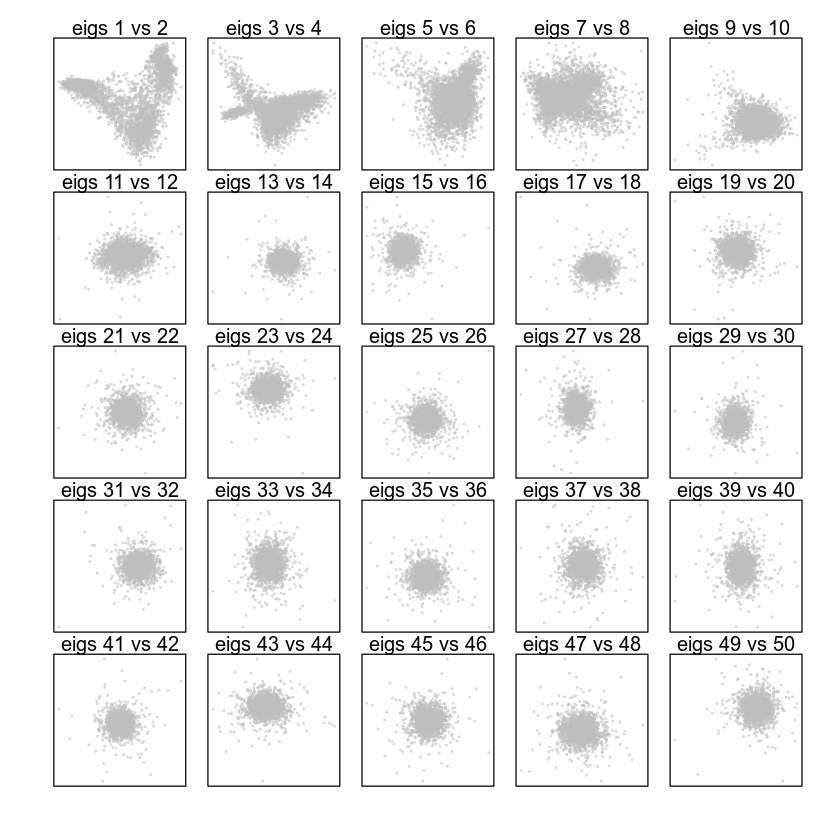

In [47]:
plotDimReductPW(
    obj=x.sp, 
    eigs.dims=1:50,
    point.size=0.3,
    point.color="grey",
    point.shape=19,
    point.alpha=0.6,
    down.sample=5000,
    pdf.file.name=NULL, 
    pdf.height=7, 
    pdf.width=7
  );

In [48]:
# library(leiden)

In [49]:
# table(x.sp@cluster)

In [50]:
x.sp = runKNN(
    obj= x.sp,
    eigs.dim=1:10,
    k=15
  );

In [51]:
x.sp = runViz(
    obj=x.sp, 
    tmp.folder=tempdir(),
    dims=2,
    eigs.dims=1:10, 
    method="umap",
    seed.use=1,
    num.cores=10,
  );

In [52]:
dim(x.sp@umap)

[1] 62599     2

In [53]:
# write features- can use for Trajectory inference
# NUM_EIGS = 9
# df = data.frame(x.sp@sample, x.sp@umap, x.sp@cluster, x.sp@smat@dmat[,1:NUM_EIGS])
# rownames(df) = paste(x.sp@sample, x.sp@barcode, sep='_')
# write.table(df, "./sessions/20200220_n74838/features.tsv", 
#             sep='\t', quote = F, row.names = T)

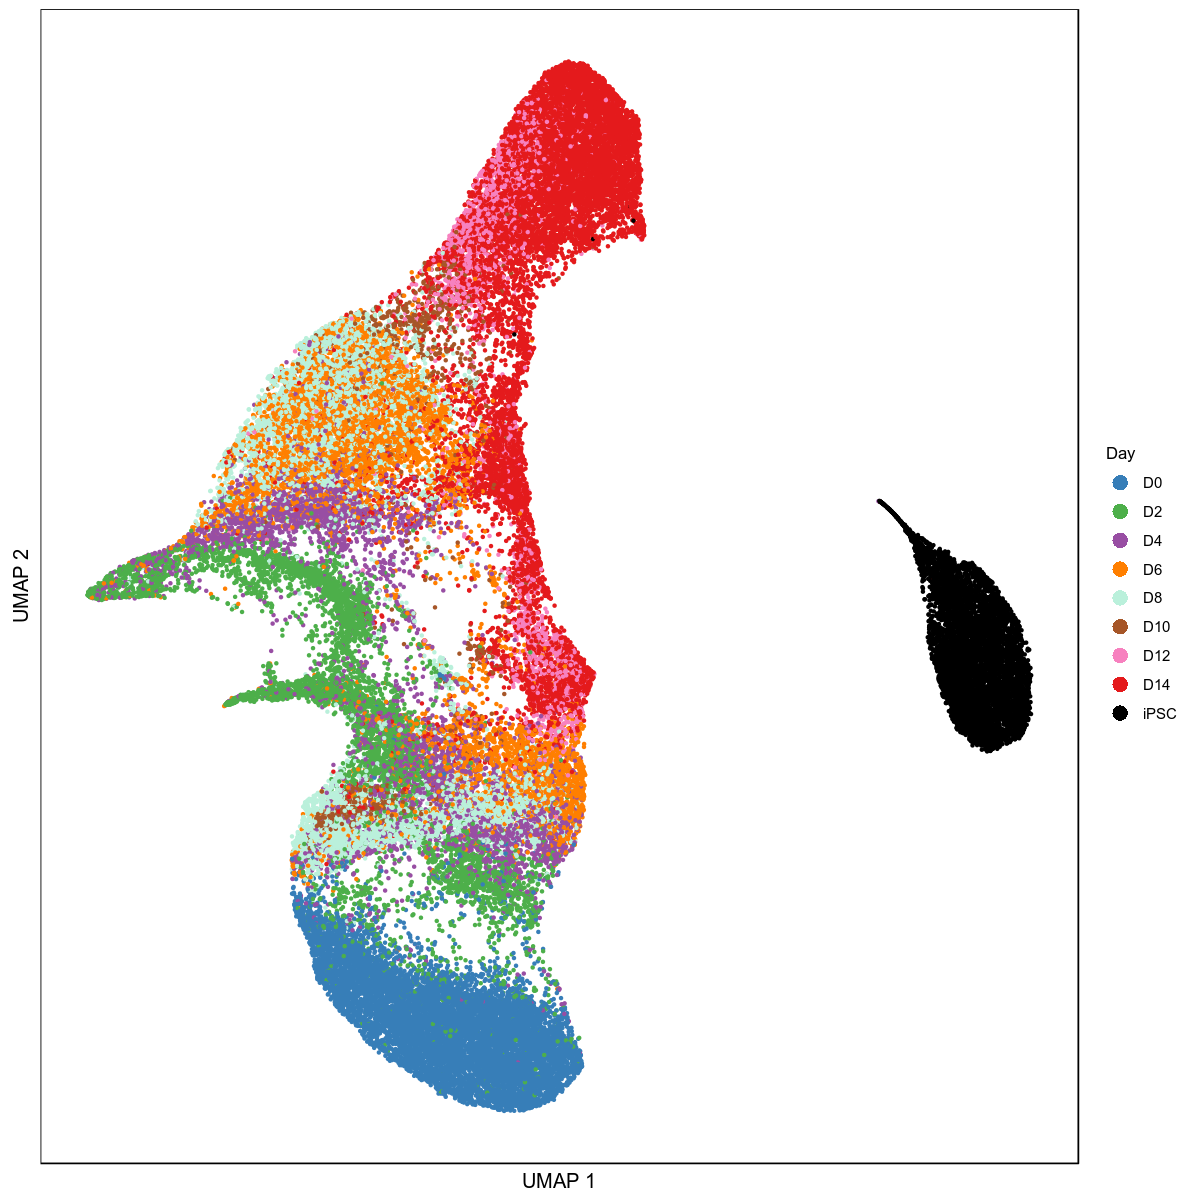

In [54]:
options(repr.plot.width = 10, repr.plot.height = 10)

# day_col_vector1 = rev(c("#336699", "#0AABB7", "#D6E82F", "#B14AED", "#2D3142", "#FF70A6", "#A61C24", "#000000"))

# Set1 palette colours (without yellow)
day_col_vector2 = c('#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', '#BAF0DB', '#A65628', '#F781BF', '#E41A1C', "#000000")

day_col_vector3 = c('#A87D6D', '#F28E6A', '#AE4527', '#A558AA', '#53DBA4', '#C5F9E4', '#AD87AF', '#EFBAB3')

# day_col_vector4 = col_vector[sample(length(col_vector), 8)]
day_col_vector4 = c('#984EA3','#F781BF','#FB8072','#A6761D','#1F78B4','#8D A0CB','#E7298A','#CBD5E8')

df = data.frame(x.sp@umap, sample=factor(x.sp@sample, levels=DAYS))
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df) +
geom_point(size=0.6, alpha=1, aes(x= -umap.2 , y= -umap.1, col=sample)) +
# scale_color_brewer( palette = "Set1") +
scale_color_manual(values=(day_col_vector2)) +
# ggtitle("All Cells (Day)") + 
theme_classic() +
xlab("UMAP 1") + ylab("UMAP 2") +
theme(plot.title = element_text(hjust = 0.5),
      text = element_text(size=12),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      legend.title=element_text(size=10), 
      legend.text=element_text(size=9),
      panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
guides(colour = guide_legend(title="Day",
                             override.aes = list(shape=16, alpha=1, size=4))) +
coord_fixed()

In [61]:
# copy over cluster from previous iteration 
rownames(metadata) = paste(metadata$sample, metadata$barcode,sep='_')
x.sp@cluster = factor(metadata[paste(x.sp@sample, x.sp@barcode, sep='_'), "cluster"])
x.sp@metaData$cluster = x.sp@cluster

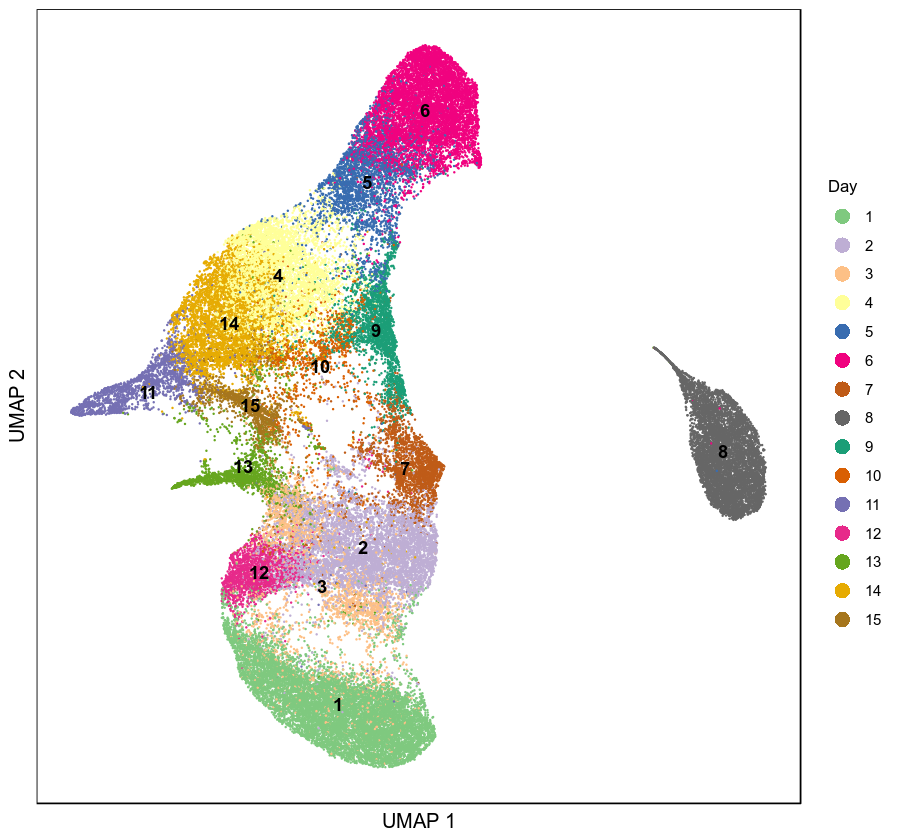

In [90]:
options(repr.plot.width = 7.5, repr.plot.height = 7)

df = data.frame(x.sp@umap, cluster=x.sp@cluster)
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df) +
geom_point(size=0.05, alpha=1, aes(x= -umap.2 , y= -umap.1, col=cluster)) +
# scale_color_brewer( palette = "Set1") +
scale_color_manual(values=col_vector) +
# ggtitle("All Cells (Day)") + 
theme_classic() +
xlab("UMAP 1") + ylab("UMAP 2") +
theme(plot.title = element_text(hjust = 0.5),
      text = element_text(size=12),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.text.y=element_blank(),
      axis.ticks=element_blank(),
      legend.title=element_text(size=10), 
      legend.text=element_text(size=9),
      panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
guides(colour = guide_legend(title="Day",
                             override.aes = list(shape=16, alpha=1, size=4))) +
geom_text(data=data.frame(aggregate(x.sp@umap, list(x.sp@cluster), mean)),
         aes(x= -umap.2, y= -umap.1, label=Group.1), fontface = "bold") 

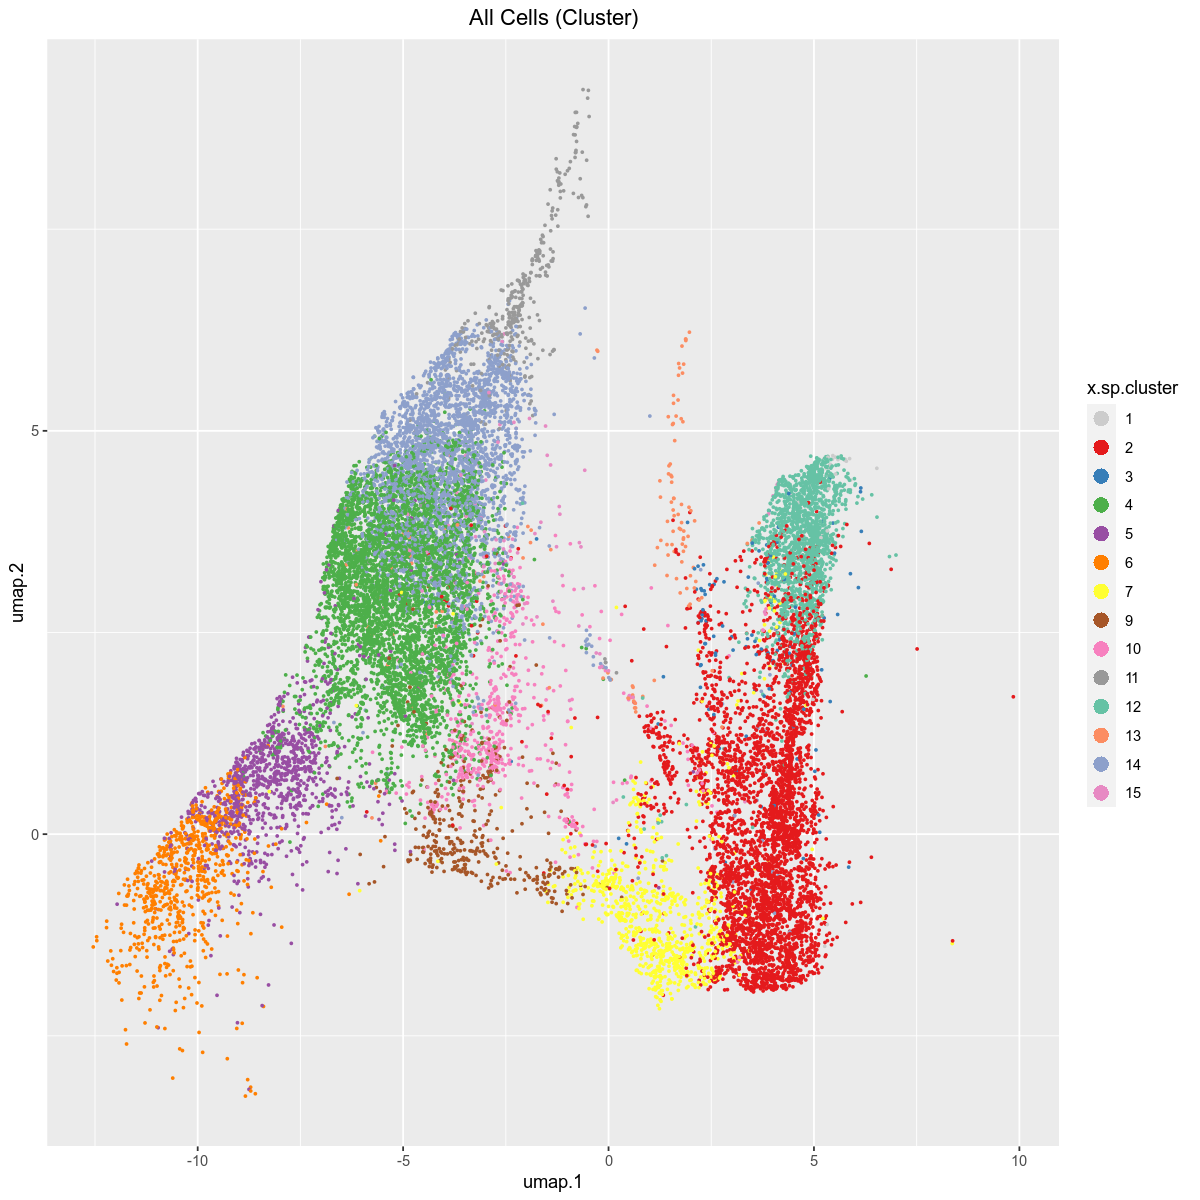

In [63]:
options(repr.plot.width = 10, repr.plot.height = 10)

df = data.frame(x.sp@umap, x.sp@cluster, x.sp@sample)
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

# ggplot(df, 
ggplot(df[(df$x.sp.sample %in% c("D6","D8","D10", "D12")),], 
       aes(x=umap.1, y=umap.2, col=x.sp.cluster)) +
geom_point(size=0.4, alpha=1) +
scale_colour_manual(values = col_vector[seq(45,74,1)]) +
ggtitle("All Cells (Cluster)") + 
theme(plot.title = element_text(hjust = 0.5)) + 
guides(colour = guide_legend(override.aes = list(shape=16, alpha=1, size=4))) 

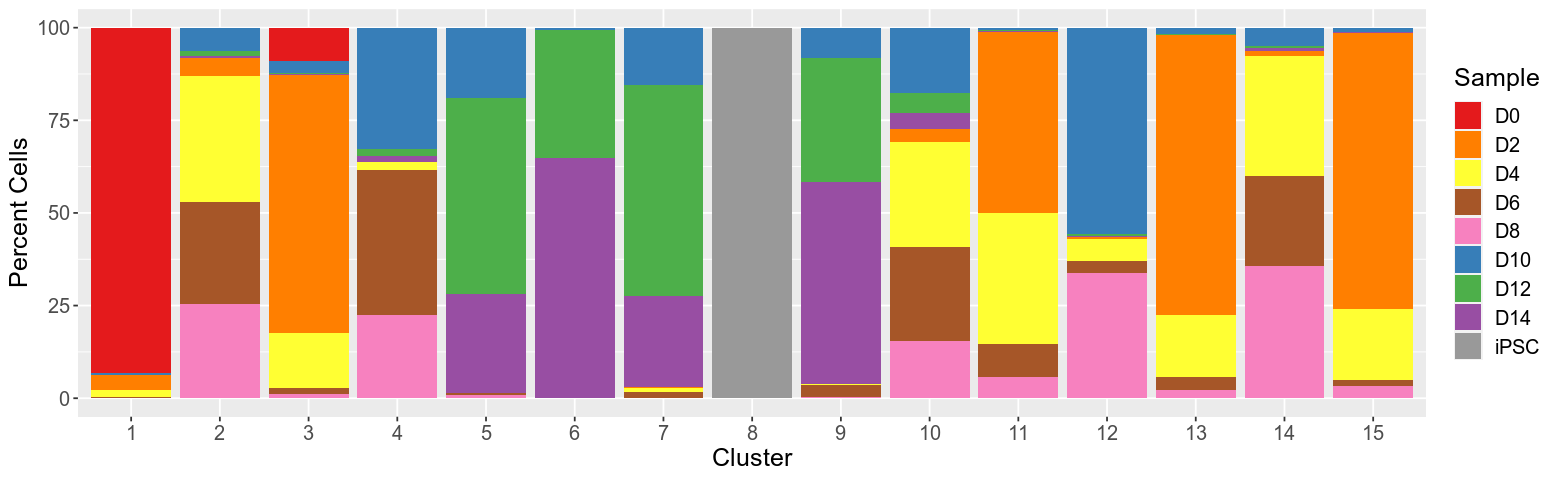

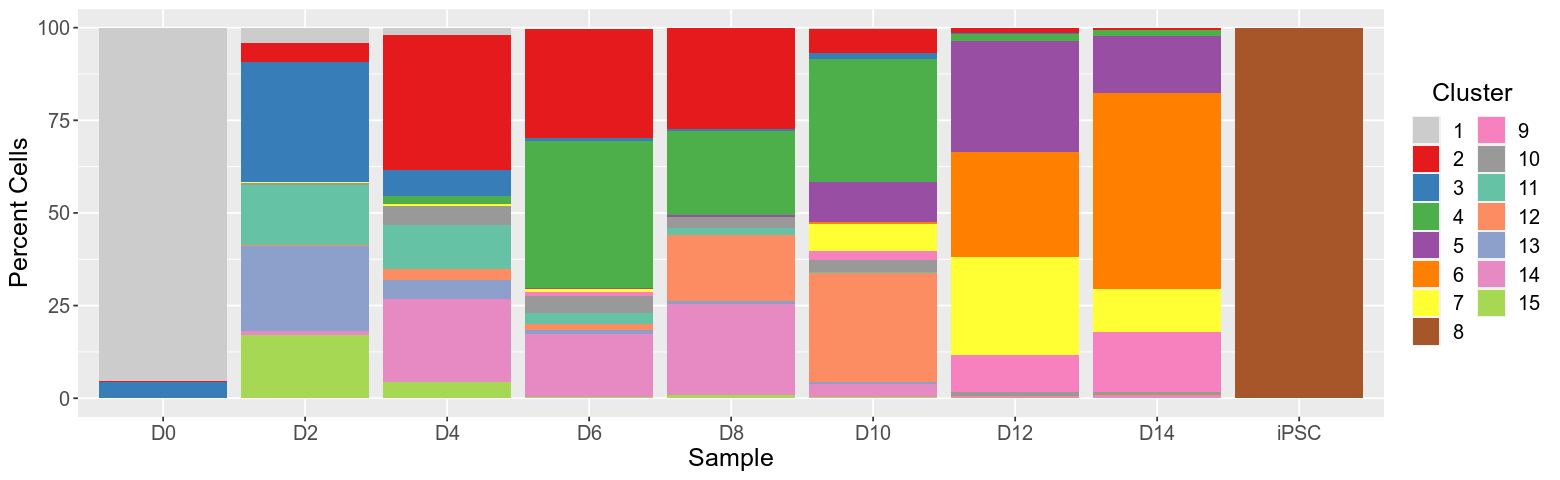

In [64]:
# TODO: clusters should be ordered such that similar ones are close in number and colour

# day-wise cluster membership + cluster-wise day membership
options(repr.plot.width = 13, repr.plot.height = 4)

sample_cluster_df = data.frame(sample=x.sp@sample, cluster=x.sp@cluster, count=1)

# count cells per sample x cluster
sample_cluster_cts = aggregate(.~sample+cluster, 
                               sample_cluster_df, 
                               sum)
# normalise per sample
sample_cts = aggregate(sample_cluster_df[,"count"], list(sample_cluster_df[,"sample"]), sum)
rownames(sample_cts) = sample_cts$Group.1
sample_cts$Group.1 = NULL

# frac of cluster per sample
sample_cluster_cts$frac_cluster = 100*sample_cluster_cts$count/sample_cts[sample_cluster_cts$sample, "x"]

# normalise per cluster
cluster_norm_cts = aggregate(sample_cluster_cts[,"frac_cluster"], list(sample_cluster_cts[,"cluster"]), sum)
rownames(cluster_norm_cts) = cluster_norm_cts$Group.1
cluster_norm_cts$Group.1 = NULL

# frac of day (after normalizing for number of cells per day) per sample
sample_cluster_cts$frac_day = 100*sample_cluster_cts$frac_cluster/cluster_norm_cts[sample_cluster_cts$cluster, "x"]

ggplot(data=sample_cluster_cts, aes(x=cluster, y=frac_day, fill=sample)) +
scale_fill_brewer(breaks=DAYS, palette = "Set1") +
geom_bar(stat="identity") +
ylab("Percent Cells") +
xlab("Cluster") +
guides(fill = guide_legend(ncol=1, title="Sample", pos="center")) +
theme(text = element_text(size=15))

# Stacked barplot with multiple groups
ggplot(data=sample_cluster_cts, aes(x=factor(sample, levels=DAYS), y=frac_cluster, fill=cluster)) +
scale_fill_manual(values = col_vector[seq(45,74,1)]) +
geom_bar(stat="identity") +
ylab("Percent Cells") +
xlab("Sample") +
guides(fill = guide_legend(ncol=2, title="Cluster", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))


In [ ]:
# Density plot

# options(repr.plot.width = 10, repr.plot.height = 10)

# df = data.frame(x.sp@umap, x.sp@sample)

# ggplot(df) +
# geom_point(shape=20, size=0.05, alpha=0.1, aes(x=umap.1 , y=umap.2)) +
# ggtitle("All Cells (Density)") + 
# theme(plot.title = element_text(hjust = 0.5))  

In [ ]:
table(x.sp@sample[x.sp@cluster=="11"])

In [70]:
options(repr.plot.width = 7.5, repr.plot.height = 7)

# DOES NOT SEEM TO AGREE WITH NUMBERS IN PLOT PATH, WHICH SHOW ~30% FRAC IN PROM
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
txdb = TxDb.Hsapiens.UCSC.hg38.knownGene
prom.hg38 = promoters(genes(txdb), upstream = 2000, downstream = 0)
overlaps = findOverlaps(x.sp@peak, prom.hg38);
idy = queryHits(overlaps)
promoter_ratio = Matrix::rowSums(x.sp@pmat[,idy]) / Matrix::rowSums(x.sp@pmat);

In [66]:
quantile(promoter_ratio, c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1))

0%        10%        25%        50%        75%        90%        99% 
0.02188006 0.05835775 0.06519223 0.07328605 0.08352599 0.09383043 0.11594203 
      100% 
0.19687500

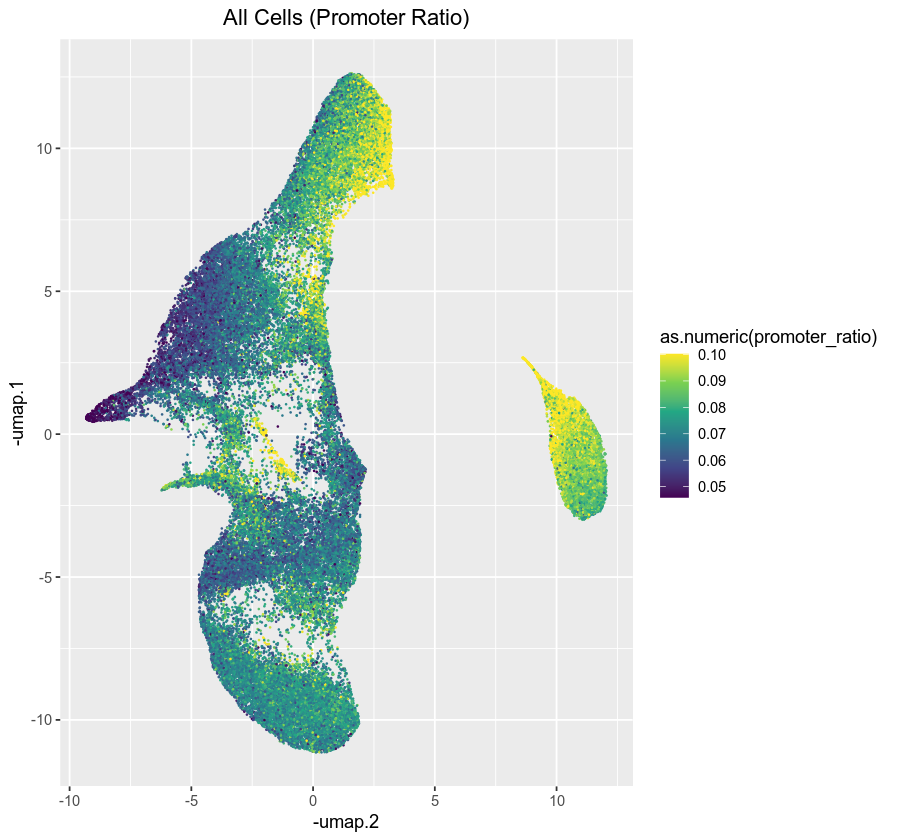

In [73]:
options(repr.plot.width = 7.5, repr.plot.height = 7)

df = data.frame(x.sp@umap, promoter_ratio)
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df, aes(x=-umap.2, y=-umap.1, col=as.numeric(promoter_ratio))) +
geom_point(size=0.1, alpha=1) +
scale_color_viridis_c(lim=c(quantile(promoter_ratio, 0.01),
                            quantile(promoter_ratio, 0.95)), 
                      oob=squish) +
ggtitle("All Cells (Promoter Ratio)") + 
theme(plot.title = element_text(hjust = 0.5)) 

#     pdf.file.name = sprintf("./figs/%s_5kb_selectedBarcodes_gt1000_n%d_UMAP_day", format(Sys.Date(), "%Y%m%d"), dim(x.sp@bmat)[1])

In [77]:
sum(rowCovs<500)

[1] 2838

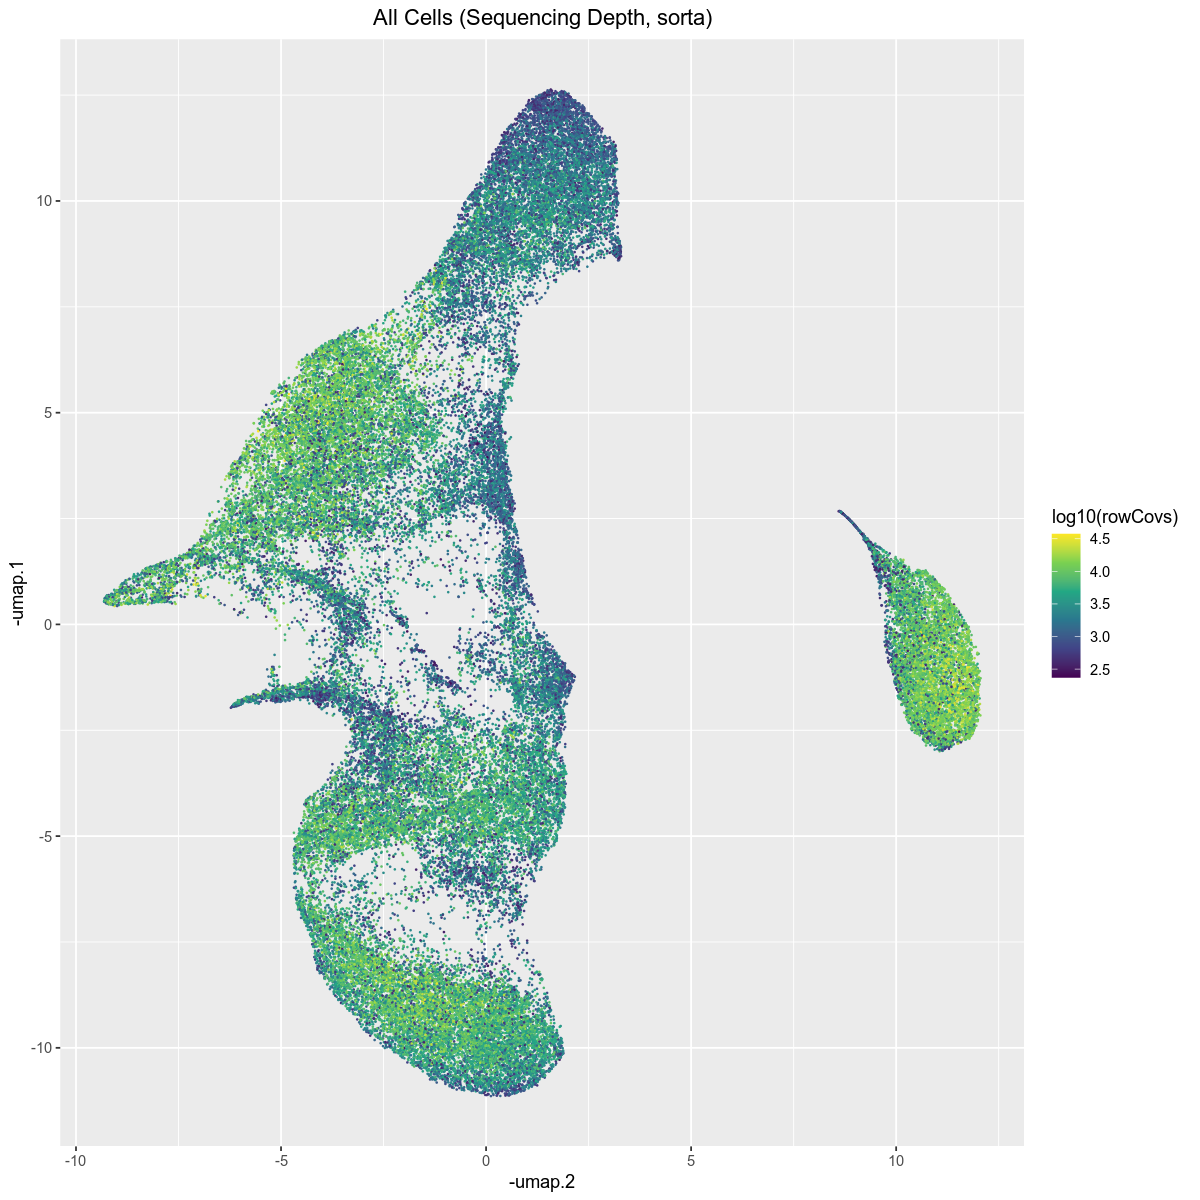

In [62]:
df = data.frame(x.sp@umap, rowCovs)
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df, aes(x=-umap.2, y= -umap.1, col=log10(rowCovs))) +
geom_point(size=0.1, alpha=1) +
scale_color_viridis_c() +
ggtitle("All Cells (Sequencing Depth, sorta)") + 
theme(plot.title = element_text(hjust = 0.5)) 

In [82]:
# alternatively from saved QC metrics
qc_scores = read.table(sprintf("%s/scores.tsv", BARCODES_PREFIX))
head(qc_scores)

nFrags tss    sample doublet_enrich
D0_CCCATGTACAGCTTTG 93719  12.422 D0     0             
D0_GGTTCCTTGCGAGTTT 92405  11.924 D0     0             
D0_AAGGTAATGACGCGAA 91264  13.197 D0     0             
D0_CTAGCTCACCCGTTAA 89717  13.101 D0     0             
D0_CAGTGGAGAGCTCTTC 88640  12.291 D0     0             
D0_CAACAACACCCTATCC 88105  13.580 D0     0

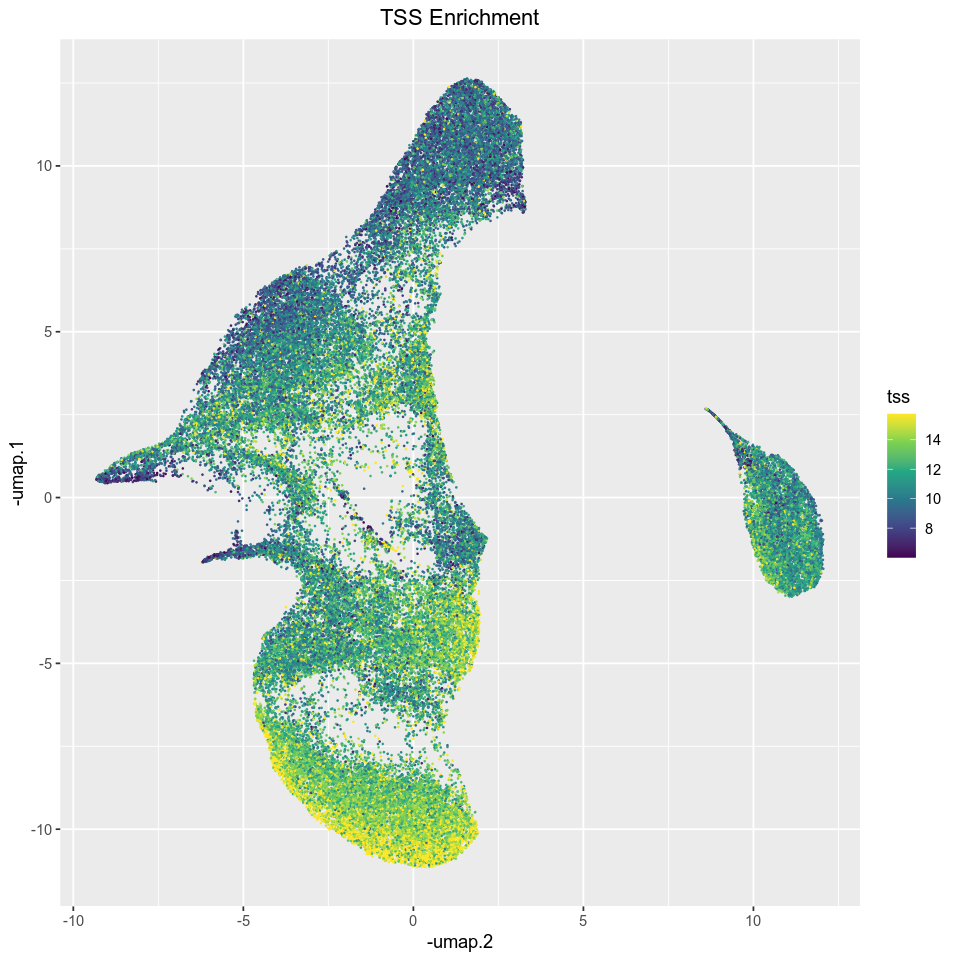

In [86]:
options(repr.plot.width = 8, repr.plot.height = 8)
s = qc_scores[paste(x.sp@sample, x.sp@barcode, sep='_'), "tss"]
df = data.frame(x.sp@umap, 
                tss=s)
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df, aes(x= -umap.2, y= -umap.1, col=tss)) +
geom_point(size=0.1, alpha=1) +
scale_color_viridis_c(limits=c(quantile(s, 0.0),
                              quantile(s, 0.95)),
                     oob=squish) +
ggtitle("TSS Enrichment") + 
theme(plot.title = element_text(hjust = 0.5)) 

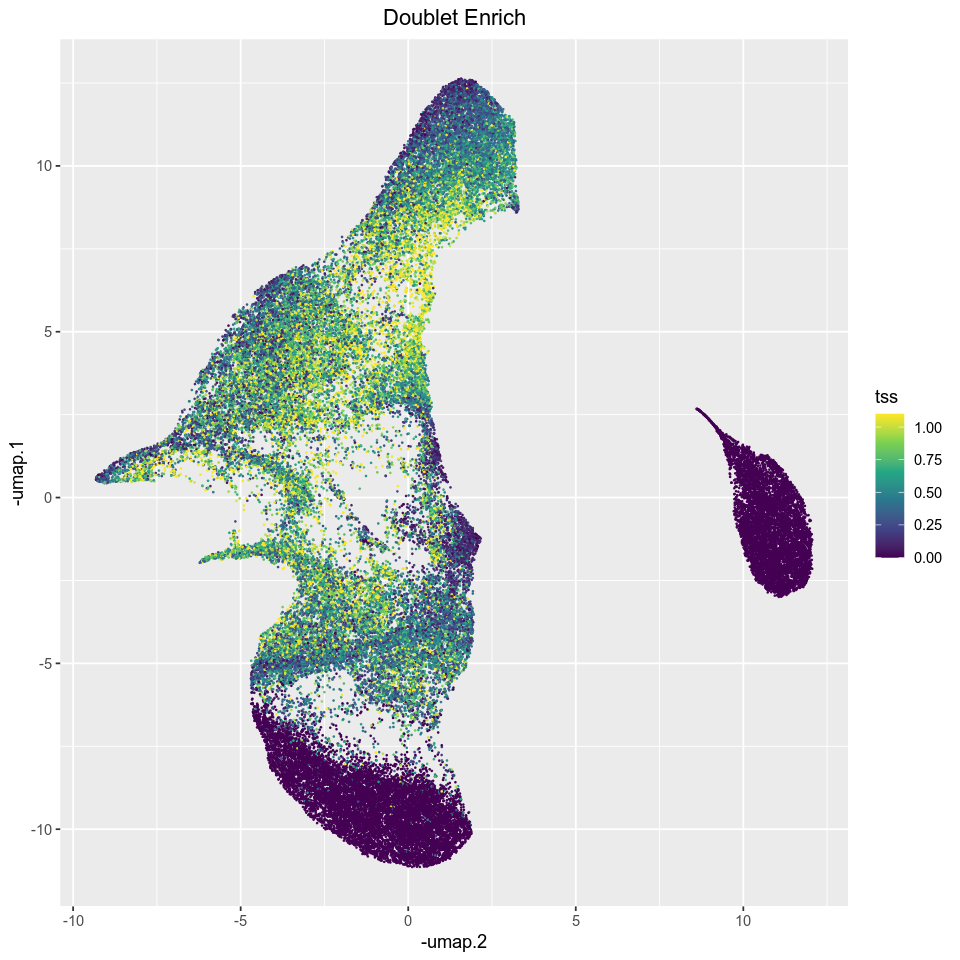

In [88]:
options(repr.plot.width = 8, repr.plot.height = 8)
s = qc_scores[paste(x.sp@sample, x.sp@barcode, sep='_'), "doublet_enrich"]
df = data.frame(x.sp@umap, 
                tss=s)
# shuffle so days don't overlap
df = df[sample(dim(df)[1]), ]

ggplot(df, aes(x= -umap.2, y= -umap.1, col=tss)) +
geom_point(size=0.1, alpha=1) +
scale_color_viridis_c(limits=c(quantile(s, 0.0),
                              quantile(s, 0.95)),
                     oob=squish) +
ggtitle("Doublet Enrich") + 
theme(plot.title = element_text(hjust = 0.5)) 

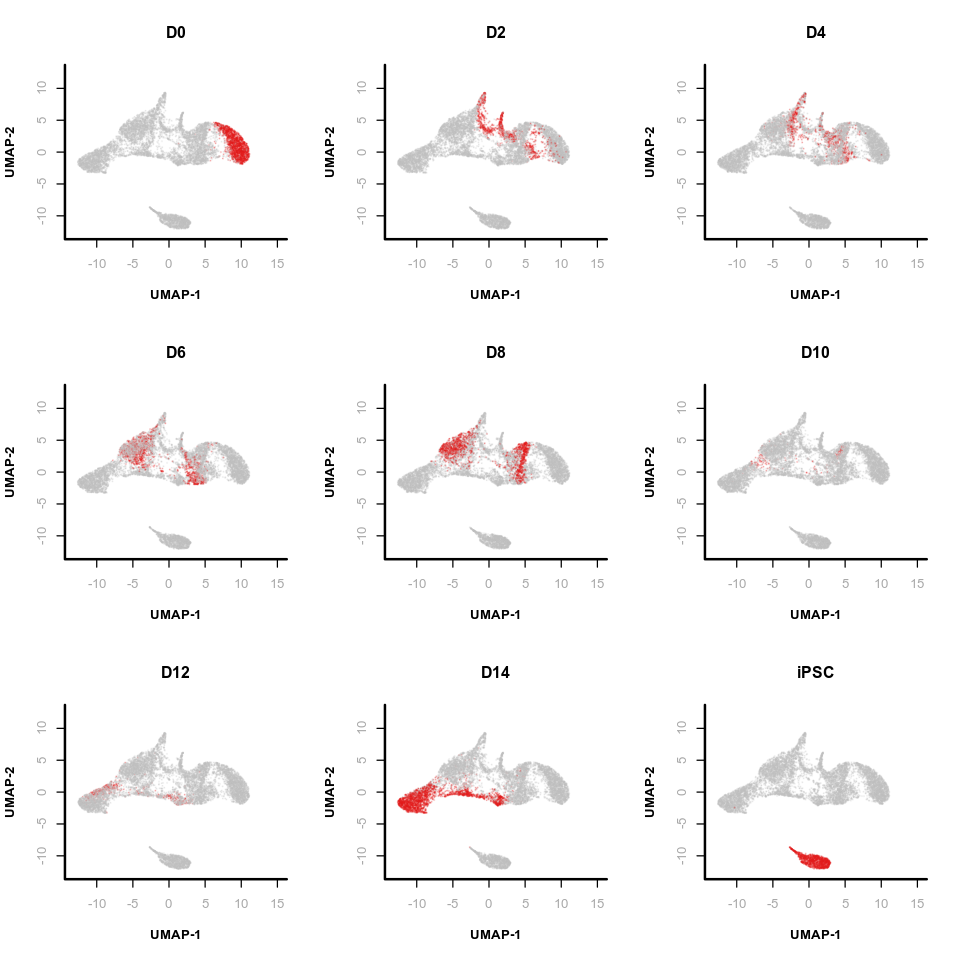

In [89]:
par(mfrow = c(3, 3));
for(d in DAYS){
  plotViz(
    obj=x.sp,
    method="umap", 
    main=d,
    point.color=x.sp@sample==d, 
    point.size=0.01,
    point.alpha=0.2,
    text.add= FALSE,
    down.sample=10000,
    legend.add=FALSE,
#     pdf.file.name = sprintf("./figs/%s_5kb_selectedBarcodes_gt1000_n%d_UMAP_day", format(Sys.Date(), "%Y%m%d"), dim(x.sp@bmat)[1])
  );
}

## Export Meta Data for Session

In [91]:
x.sp

number of barcodes: 62599
number of bins: 0
number of genes: 0
number of peaks: 504369
number of motifs: 0

In [100]:
myExportMetaData <- function(obj, file, slot.names) {
    metaData.ls = lapply(as.list(slot.names), function(x){
        if(x == "barcode"){
            y = data.frame(slot(obj, x));
            colnames(y) = "barcode"
        }else if(x == "tsne"){
            y = data.frame(slot(obj, x));
            colnames(y) = c("tsne1", "tsne2");
        }else if(x == "umap"){
            y = data.frame(slot(obj, x));
#             y = -y[,c(2,1)] # interchange UMAPs and sign
            colnames(y) = c("umap1", "umap2");
        }else if(x == "cluster"){
            y = data.frame(slot(obj, x));
            colnames(y) = "cluster"
        }else if(x == "sample"){
            y = data.frame(slot(obj, x));
            colnames(y) = "sample"
        }else{
            y = data.frame(slot(obj, x));
        }
        y
    })
    
    if(!all(sapply(lapply(metaData.ls, nrow), FUN = identical, nrow(metaData.ls[[1]])))){
        stop("slot in subset.names have different length")
    }
    
    metaData.df = do.call(cbind, metaData.ls);

    write.table(metaData.df, file = file, append = FALSE, quote = FALSE, sep = "\t",
                eol = "\n", na = "NA", dec = ".", row.names = FALSE,
                col.names = TRUE, qmethod = c("escape", "double"),
                fileEncoding = "")
}

myExportMetaData(x.sp, "./sessions/20210717_n62599/metadata.tsv", slot.names=c('barcode', 'sample', 'umap', 'cluster'))

In [93]:
# reload non-binarized
x.sp = addPmatToSnap(x.sp);

Epoch: reading cell-peak count matrix session ...



In [94]:
x.sp

number of barcodes: 62599
number of bins: 0
number of genes: 0
number of peaks: 531538
number of motifs: 0

In [95]:
black_list = read.table("../../../resources/blacklist/GRch38_unified_blacklist.bed");
black_list.gr = GRanges(
    black_list[,1], 
    IRanges(black_list[,2], black_list[,3])
  );

In [96]:
idy = queryHits(findOverlaps(x.sp@peak, black_list.gr));

In [97]:
if(length(idy) > 0){x.sp = x.sp[,-idy, mat="pmat"]};

In [98]:
x.sp

number of barcodes: 62599
number of bins: 0
number of genes: 0
number of peaks: 530910
number of motifs: 0

In [101]:
writeMM(x.sp@pmat, file="./sessions/20210717_n62599/pmat.sparse.mm")

NULL

In [102]:
write.table(data.frame(sample_barcode=paste(x.sp@sample, x.sp@barcode, sep='_'), x.sp@smat@dmat),
            "./sessions/20210717_n62599/features.50d.tsv", sep="\t", row.names= FALSE, col.names = T, quote = FALSE)
write.table(data.frame(sample_barcode=paste(x.sp@sample, x.sp@barcode, sep='_'), x.sp@smat@dmat[,1:10]),
            "./sessions/20210717_n62599/features.10d.tsv", sep="\t", row.names= FALSE, col.names = T, quote = FALSE)

In [103]:
# writing ranges
write.table(data.frame(seqnames=seqnames(x.sp@peak),
                       starts=start(x.sp@peak),
                       ends=end(x.sp@peak)),
            file="./sessions/20210717_n62599/peaks.bed",
            quote=F, sep="\t", row.names=F, col.names=F)

In [ ]:
# How to get the order in which a list A can be transformed to a list B 
# When both have same unique elements in them
# o(A)   o(B) o(o(B))   o(A)[o(o(B))] <---- that's what you need to do
# 3   ->  4     3           2
# 4   ->  2     2           4 
# 2   ->  1     4           1
# 1   ->  3     1           3

In [32]:
# metaData = read.table("./snapATAC_sessions/20200125_n76770/metadata.tsv", header = T)
# metaData$sample_barcode = paste(as.character(metaData$sample), as.character(metaData$barcode), sep='_')

In [ ]:
# actual_sample_barcode = paste(x.sp.raw@sample, x.sp.raw@barcode, sep="_")

In [ ]:
# sort_order = order(actual_sample_barcode)[order(order(metaData$sample_barcode))]

In [ ]:
# all(actual_sample_barcode[sort_order] == metaData$sample_barcode)

In [42]:
# writeMM(x.sp.raw@bmat[sort_order, ], file="./snapATAC_sessions/20200125_n76770/5kb.full.mm")

NULL

---

In [99]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/snapATAC/lib/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] TxDb.Hsapiens.UCSC.hg38.knownGene_3.4.0
 [2] GenomicFeatures_1.34.1                 
 [3] AnnotationDbi_1.44.0                   
 [4] Biobase_2.42.0                         
 [5] RColorBrewer_1.1-2                     
 [6] scales_1.1.0                           
 [7] ggp